# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [51]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

import numpy as np

# For Data Visualization

import matplotlib.pyplot as plt

import seaborn as sns

# For Model Building

import tensorflow as tf

import keras

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization,Conv2D, MaxPooling2D, Flatten, LeakyReLU

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report, confusion_matrix


**Let us check the version of tensorflow.**

In [ ]:
print(tf.__version__)

2.15.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
import h5py

# Define the file path
file_path = '/content/drive/MyDrive/Colab Notebooks/MIT_ELECTIVE_PROJECT/DEEP_LEARNING /SVHN_single_grey1.h5'  # Replace with the actual file path

# Access the .h5 file
with h5py.File(file_path, 'r') as h5f:
# Explore the contents of the .h5 file
    print("Keys in the .h5 file:", list(h5f.keys()))  # Print the keys (datasets) in the file

 # Load the datasets
    X_train = h5f['X_train'][:]
    y_train = h5f['y_train'][:]
    X_test = h5f['X_test'][:]
    y_test = h5f['y_test'][:]

Keys in the .h5 file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


Check the number of images in the training and the testing dataset.

In [ ]:
# Print the number of images in the training and testing datasets
print("Shape of X_train (training dataset):", X_train.shape)
print("Shape of X_test (testing dataset):", X_test.shape)

Shape of X_train (training dataset): (42000, 32, 32)
Shape of X_test (testing dataset): (18000, 32, 32)


**Observation:**
##### There are 42,000 images in the training dataset, with each image having dimensions of 32x32 pixels
##### There are 18,000 images in the testing dataset, with each image having dimensions of 32x32 pixels

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

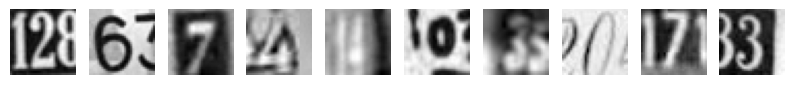

First 10 labels (digits): [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualize the first 10 images
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

# Print the first 10 labels
print("First 10 labels (digits):", y_train[:10])

In [ ]:
# Get unique labels
unique_labels = np.unique(y_train)

# Print unique labels
print("All existing labels:", unique_labels)

All existing labels: [0 1 2 3 4 5 6 7 8 9]


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Shape of the first image
print("Shape of the first image in the training dataset:", X_train[0].shape)
print()
# Array of pixels for the first image
print("Array of pixels for the first image in the training dataset:")
print(X_train[0])

Shape of the first image in the training dataset: (32, 32)

Array of pixels for the first image in the training dataset:
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Calculates the total number of pixels in each image
X_train.shape[1] * X_train.shape[2]

1024

In [ ]:
# Reshaping the dataset to flatten it.
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)
X_train.shape

(42000, 1024)

### **Normalize the train and the test data**

In [ ]:
# Normalize the train dataset
X_train_normalized = X_train / 255.0

# Normalize the test dataset
X_test_normalized = X_test / 255.0

Print the shapes of Training and Test data

In [ ]:
# Print the new shapes of the normalized train and test datasets
print("Shape of the normalized training dataset:", X_train_normalized.shape)
print("Shape of the normalized testing dataset:", X_test_normalized.shape)

Shape of the normalized training dataset: (42000, 1024)
Shape of the normalized testing dataset: (18000, 1024)


### **One-hot encode output**

In [ ]:
# One-hot encode the target variable for the training dataset
y_train_encoded = to_categorical(y_train)
print("Shape of one-hot encoded y_train_encoded:", y_train_encoded.shape)
# One-hot encode the target variable for the testing dataset
y_test_encoded = to_categorical(y_test)
print("Shape of one-hot encoded y_test_encoded:", y_test_encoded.shape)

Shape of one-hot encoded y_train_encoded: (42000, 10)
Shape of one-hot encoded y_test_encoded: (18000, 10)


**Observation:**
###### Target variable and test and are both one-hot encoded, with shapes (42000, 10) and (18000, 10), respectively.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
# Set seed for reproducibility
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
def nn_model_1():
    # Create a sequential model
    model= Sequential()
    # First hidden layer with 64 nodes and relu activation
    model.add(Dense(64, activation='relu', input_shape=(1024, )))
    # Second hidden layer with 32 nodes and relu activation
    model.add(Dense(32, activation='relu'))
    # Output layer with softmax activation for multi-class classification
    model.add(Dense(10, activation='softmax'))
    # Compile the model
    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

# Call the nn_model_1 function and store the model in a new variable
model_1 = nn_model_1()

# Print the summary of the model
model_1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model on the training data
history_model_1 = model_1.fit(X_train_normalized, y_train_encoded, validation_split=0.2,
                     batch_size=128, verbose=1, epochs=20)

Epoch 1/20
263/263 [==============================] - 3s 8ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 3s 11ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 3s 12ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 3s 13ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 2s 7ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 2s 6ms/step - loss: 1.3588 - accuracy: 0.5568 - val_loss: 1.3240 - val_accuracy: 0.5768
Epoch 7/20
263/263 [==============================] - 1s 6ms/step - loss: 1.2895 - accuracy: 0.5839 - val_loss: 1.2558 - val_accuracy: 0.6013
Epo

### **Plot the Training and Validation Accuracies and write down your Observations.**

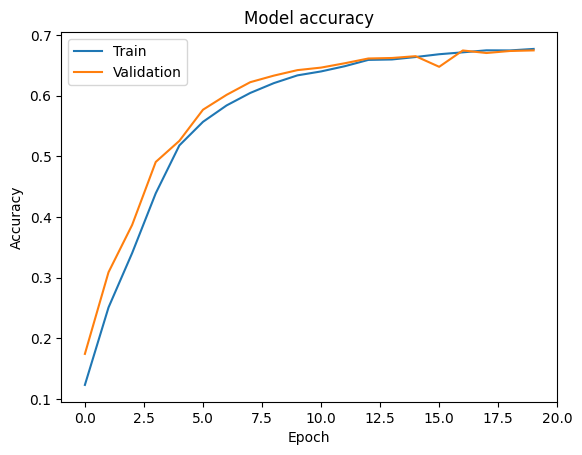

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_model_1.history['accuracy'])
plt.plot(history_model_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Set the x-axis range to include all epochs (-1 to 20)
plt.xlim([-1, 20])

# Show the plot
plt.show()

**Observations:_______**

##### Training and validation accuracies increase with the increase in epochs, although validation has a bit of fluctuation
##### Maximum accuracy for both training and validation is reached at 20 epochs.
##### At 20 epochs the training accuracy reaches 68% and the validation accuracy reaches 67%.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clear the previous model's history from the Keras backend.
keras.backend.clear_session()

In [ ]:
# Set seed for reproducibility
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
# Define the second model
def nn_model_2():
    # Create a sequential model
    model = Sequential()
    # First hidden layer with 256 nodes and relu activation
    model.add(Dense(256, activation='relu', input_shape=(1024,)))
    # Second hidden layer with 128 nodes and relu activation
    model.add(Dense(128, activation='relu'))
    # Add the Dropout layer with the rate equal to 0.2
    model.add(Dropout(0.2))
    # Third hidden layer with 64 nodes and relu activation
    model.add(Dense(64, activation='relu'))
    # Fourth hidden layer with 64 nodes and relu activation
    model.add(Dense(64, activation='relu'))
    # Fifth hidden layer with 32 nodes and relu activation
    model.add(Dense(32, activation='relu'))
    # Add the BatchNormalization layer
    model.add(BatchNormalization())
    # Output layer with softmax activation for multi-class classification
    model.add(Dense(10, activation='softmax'))
    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                  metrics=['accuracy'])
    return model

# Call the nn_model_2 function and store the model in a new variable
model_2 = nn_model_2()

# Print the summary of the second model
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               262400    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)               

In [ ]:
# Fit the second model on the train data
history_model_2 = model_2.fit(X_train_normalized, y_train_encoded, validation_split=0.2,
                              batch_size=128, verbose=1, epochs=30)

Epoch 1/30
263/263 [==============================] - 8s 14ms/step - loss: 2.3300 - accuracy: 0.1007 - val_loss: 2.3138 - val_accuracy: 0.0967
Epoch 2/30
263/263 [==============================] - 7s 26ms/step - loss: 2.3042 - accuracy: 0.1028 - val_loss: 2.3015 - val_accuracy: 0.1100
Epoch 3/30
263/263 [==============================] - 6s 22ms/step - loss: 2.1699 - accuracy: 0.1746 - val_loss: 2.0564 - val_accuracy: 0.2769
Epoch 4/30
263/263 [==============================] - 4s 15ms/step - loss: 1.6402 - accuracy: 0.4238 - val_loss: 1.4454 - val_accuracy: 0.5273
Epoch 5/30
263/263 [==============================] - 3s 11ms/step - loss: 1.3608 - accuracy: 0.5385 - val_loss: 1.3064 - val_accuracy: 0.5701
Epoch 6/30
263/263 [==============================] - 4s 13ms/step - loss: 1.2484 - accuracy: 0.5870 - val_loss: 1.1214 - val_accuracy: 0.6388
Epoch 7/30
263/263 [==============================] - 5s 18ms/step - loss: 1.1568 - accuracy: 0.6251 - val_loss: 1.1023 - val_accuracy: 0.6400

### **Plot the Training and Validation Accuracies and write down your Observations.**

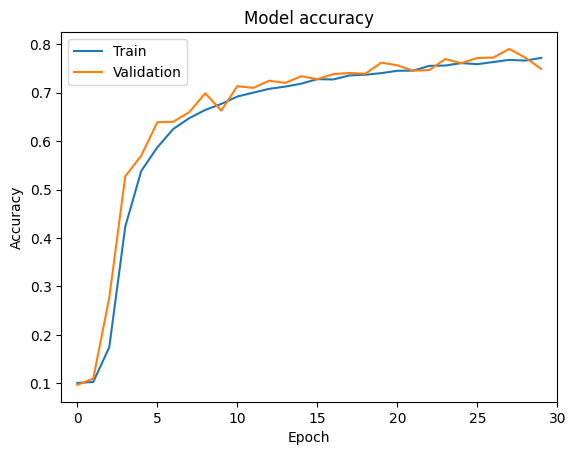

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_model_2.history['accuracy'])
plt.plot(history_model_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Set the x-axis range to include all epochs (-1 to 20)
plt.xlim([-1, 30])

# Show the plot
plt.show()

**Observations:_______**
##### Model 2 achieves a higher final training and validation accuracy compared to Model 1, indicating better overall performance.
##### The training and validation accuracies show a consistent increasing trend across epochs, with both metrics steadily improving.

##### At the initial epochs, the model demonstrates relatively low accuracies, with the training accuracy starting at around 10% and the validation accuracy around 9-11%.

##### As training progresses, both the training and validation accuracies gradually increase, indicating that the model is learning from the data.

##### By the 30th epoch, the training accuracy reaches approximately 77%, while the validation accuracy stabilizes at around 75-76%.

##### Overall, the model exhibits a satisfactory learning curve, with both training and validation accuracies improving over time. However, there is a slight fluctuation observed in the validation accuracy, suggesting potential issues with model generalization or overfitting.


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
# Make predictions on the test data
y_test_pred = model_2.predict(X_test_normalized)
# Convert the predictions from one-hot encoded to label format
y_test_pred_labels = np.argmax(y_test_pred, axis=1)


563/563 [==============================] - 2s 3ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Convert the test labels from one-hot encoded to label format
y_test_labels = np.argmax(y_test_encoded, axis=1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

In [ ]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_test_pred_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1814
           1       0.59      0.89      0.71      1828
           2       0.76      0.77      0.76      1803
           3       0.78      0.67      0.72      1719
           4       0.73      0.85      0.79      1812
           5       0.82      0.67      0.73      1768
           6       0.76      0.72      0.74      1832
           7       0.75      0.82      0.78      1808
           8       0.71      0.71      0.71      1812
           9       0.83      0.65      0.73      1804

    accuracy                           0.74     18000
   macro avg       0.76      0.74      0.74     18000
weighted avg       0.76      0.74      0.74     18000



In [ ]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_test_pred_labels))



Confusion Matrix:
[[1266  143   53   28   84    4  102   44   50   40]
 [   7 1619   15   15   50    8   17   71   14   12]
 [   7  109 1387   24   50   10   22  155   23   16]
 [  11  166   78 1154   34  112   18   66   55   25]
 [  22   99   45   16 1547    8   21   15   16   23]
 [  19  109   37  120   47 1178   92   24  101   41]
 [  51   88   26   15  116   36 1312   14  159   15]
 [   5  174   71    8   21   11   18 1482    6   12]
 [  29  120   46   40   66   32  104   30 1290   55]
 [  47  124   66   56   90   45   31   76   99 1170]]


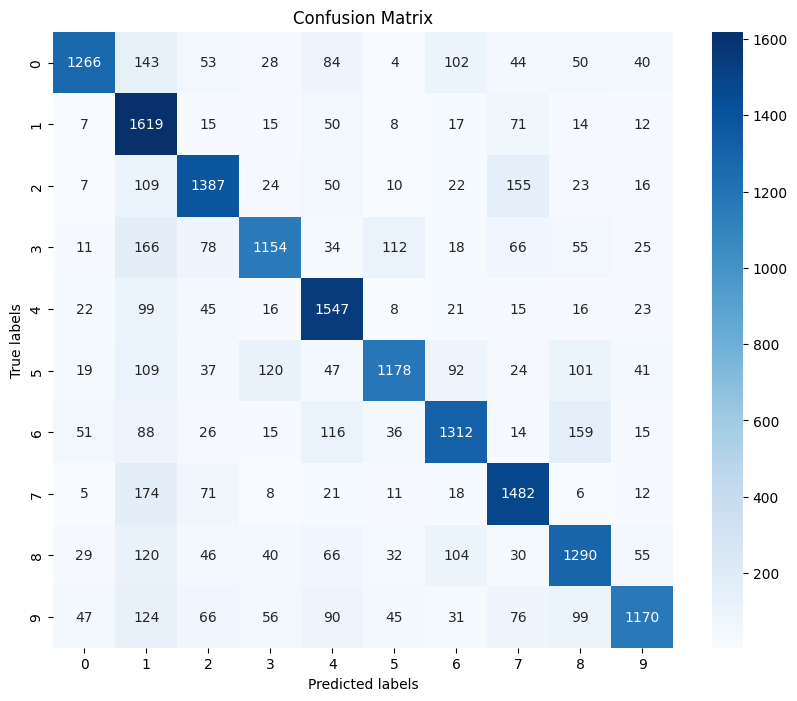

In [ ]:

# Print confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_test_pred_labels)
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

**Final Observations:__________**
##### The model achieves an accuracy of 74%, indicating that 74% of the instances are correctly classified.
##### Precision values range from 59% to 86%, indicating varying accuracy in class predictions. Higher precision is seen in classes like 0, 2, 4, 6, and 7.
##### Recall values range from 65% to 89%, showing how well the model captures instances of each class. Higher recall is observed in classes 1, 2, 4, and 7.
##### F1-scores range from 0.71 to 0.79, reflecting the balance between precision and recall. Classes 0, 2, 4, 6, and 7 have higher F1-scores, indicating better overall performance in these classes.
##### Classes 1, 3, 5, 8, and 9 show lower precision, recall, and F1-scores, suggesting that the model struggles more with these digits, potentially due to their complexity or similarity to other digits.
##### The confusion matrix shows reasonable performance in distinguishing between digits, with higher correct prediction counts for digits 0, 1, 2, 4, and 7.
##### Noticeable misclassifications occur, especially between digits 0 and 1, and between digits 3 and 5.
##### Errors are distributed somewhat evenly across different classes, indicating a balanced dataset and consistent model performance.








## **Using Convolutional Neural Networks**

In [ ]:
# Clear the previous model's history from the Keras backend.
keras.backend.clear_session()

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
import h5py

# Define the file path
file_path = '/content/drive/MyDrive/Colab Notebooks/MIT_ELECTIVE_PROJECT/DEEP_LEARNING /SVHN_single_grey1.h5'  # Replace with the actual file path

# Access the .h5 file
with h5py.File(file_path, 'r') as h5f:
# Explore the contents of the .h5 file
    print("Keys in the .h5 file:", list(h5f.keys()))  # Print the keys (datasets) in the file

 # Load the datasets
    X_train = h5f['X_train'][:]
    y_train = h5f['y_train'][:]
    X_test = h5f['X_test'][:]
    y_test = h5f['y_test'][:]



Keys in the .h5 file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


Check the number of images in the training and the testing dataset.

In [ ]:
# Check the number of images in the training dataset
num_train_images = X_train.shape[0]
print(f"Number of images in the training dataset: {num_train_images}")
# Check the number of images in the testing dataset
num_test_images = X_test.shape[0]
print(f"Number of images in the testing dataset: {num_test_images}")


Number of images in the training dataset: 42000
Number of images in the testing dataset: 18000


**Observation:**
##### The training dataset consists of 42,000 images, each with dimensions of 32x32 pixels
##### The testing dataset comprises 18,000 images, also with dimensions of 32x32 pixels.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
#  Print the shape and the array of pixels for the first image in the training dataset
print("Shape of the first image in the training dataset:", X_train[0].shape)
print("Array of pixels for the first image in the training dataset:\n", X_train[0])


Shape of the first image in the training dataset: (32, 32)
Array of pixels for the first image in the training dataset:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Reshape the train and the test dataset to include the channel dimension
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
# Normalize the datasets by dividing by 255
X_train = X_train / 255.0
X_test = X_test / 255.0

Print New shape of Training and Test

In [ ]:
# Print the new shapes of the train and the test dataset
print("New shape of the training dataset:", X_train.shape)
print("New shape of the test dataset:", X_test.shape)

New shape of the training dataset: (42000, 32, 32, 1)
New shape of the test dataset: (18000, 32, 32, 1)


In [ ]:
# Num of classes in  y_train
num_classes_train = len(np.unique(y_train))
print("Number of classes:", num_classes_train)


Number of classes: 10


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# One-hot encode the target variable
y_train= tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test= tf.keras.utils.to_categorical(y_test, num_classes=10)
print("Shape of one-hot encoded y_train:", y_train.shape)
print("Shape of one-hot encoded y_test:", y_test.shape)

Shape of one-hot encoded y_train: (42000, 10)
Shape of one-hot encoded y_test: (18000, 10)


**Observation:**
##### There are 42,000 samples in the training dataset, each associated with 10 classes represented in a one-hot encoded format.
###### There are 18,000 samples in the testing dataset, also each associated with 10 classes represented in a one-hot encoded format.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
# Set seed for reproducibility
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:

def cnn_model_1():
    # Create a sequential model
    model = Sequential()

    # First Convolutional layer with 16 filters, kernel size 3x3, same padding, and input shape (32, 32, 1)
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(alpha=0.1))  # Add LeakyReLU activation with slope 0.1

    # Second Convolutional layer with 32 filters, kernel size 3x3, and same padding
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Add LeakyReLU activation with slope 0.1

    # Max-pooling layer with pool size 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Dense layer with 32 nodes
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))  # Add LeakyReLU activation with slope 0.1

    # Output layer with nodes equal to the number of classes (10) and 'softmax' activation
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

# Call the cnn_model_1 function and store the model in a new variable
cnn_model_1 = cnn_model_1()

# Print the summary of the model
cnn_model_1.summary()
# Fit the model on the training data
history_cnn_model_1= cnn_model_1.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=20, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

### **Plot the Training and Validation Accuracies and Write your observations.**

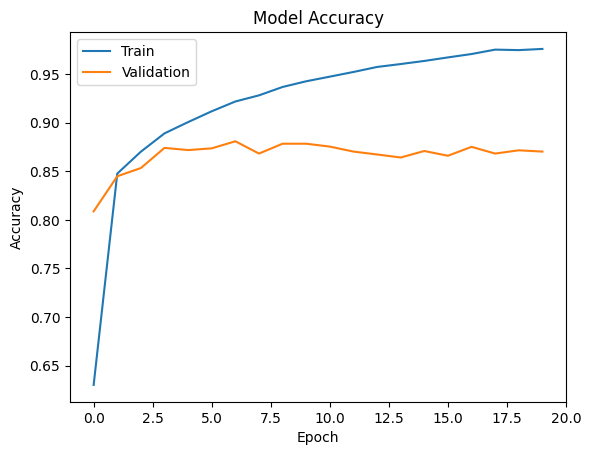

In [ ]:
# Plotting the Training and Validation Accuracies
plt.plot(history_cnn_model_1.history['accuracy'])
plt.plot(history_cnn_model_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Set the x-axis range to include all epochs (-1 to 20)
plt.xlim([-1, 20])

# Show the plot
plt.show()

**Observations:__________**
##### The model starts with a training accuracy of 63% and a validation accuracy of about 81% at epoch 1, indicating a reasonable initial fit.
##### By epoch 3, both training and validation accuracies see a significant boost, reaching approximately 87% and 85%, respectively.
##### From epoch 4 to epoch 7, the training accuracy improves steadily from 89% to 92%, while the validation accuracy shows a smaller but consistent increase, peaking at around 88%.
##### After epoch 7, the training accuracy continues to rise, although at a slower pace, reaching up to 97% by epoch 20. However, the validation accuracy fluctuates slightly, generally staying around 87-88%.
##### The gap between training and validation accuracies widens slightly towards the later epochs, suggesting potential overfitting as the model becomes highly accurate on the training data but less so on the validation set.


Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clear the previous model's history from the Keras backend.
keras.backend.clear_session()

In [ ]:
# Set seed for reproducibility
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [49]:
def cnn_model_2():
    model = Sequential()

    # First Convolutional layer
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(alpha=0.1))

    # Second Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Third Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Fourth Convolutional layer
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Flatten the output
    model.add(Flatten())

    # Dense layer
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

# Call the cnn_model_2 function and store the model in a new variable
cnn_model_2 = cnn_model_2()

# Print the summary of the model
cnn_model_2.summary()
# Fit the model on the training data
history_cnn_model_2= cnn_model_2.fit(X_train, y_train, validation_split=0.2, batch_size=128, epochs=30, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

### **Plot the Training and Validation accuracies and write your observations.**

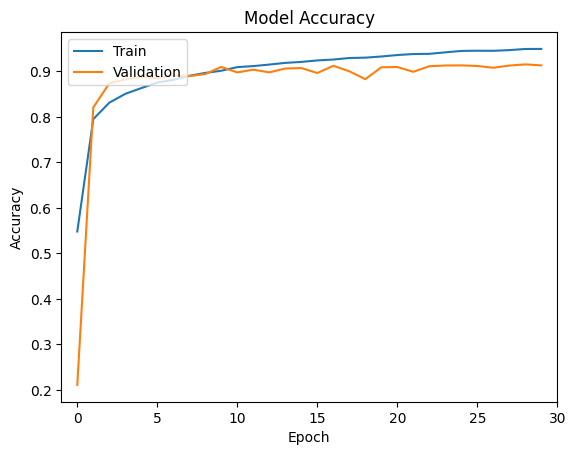

In [52]:
# Plotting the Training and Validation Accuracies
plt.plot(history_cnn_model_2.history['accuracy'])
plt.plot(history_cnn_model_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Set the x-axis range to include all epochs (-1 to 30)
plt.xlim([-1, 30])

# Show the plot
plt.show()

**Observations:________**
##### The model starts with a modest training accuracy of 54.8% and a very low validation accuracy of 21.1% at epoch 1, indicating an initial underfit.
##### By epoch 2, both training and validation accuracies see a significant boost, reaching approximately 79.5% and 82.1%, respectively.
##### From epoch 3 to epoch 10, training accuracy improves steadily from 83.1% to 90.1%, while validation accuracy shows a more rapid increase, reaching around 90.9% by epoch 10.
##### After epoch 10, both training and validation accuracies generally maintain high levels, with training accuracy peaking at 95% and validation accuracy consistently around 91%.
##### There are minor fluctuations in validation accuracy across the epochs, suggesting the model’s robustness and slight overfitting as the training accuracy continues to rise while validation accuracy experiences slight variations.
##### The increasing gap between training and validation accuracies in later epochs hints at slight overfitting, where the model performs better on the training data compared to the validation set.


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [54]:
# Make predictions on the test set using the second model
predictions = cnn_model_2.predict(X_test)


563/563 [==============================] - 19s 33ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [55]:
# Convert each entry of y_test to a single label
y_test_labels = np.argmax(y_test, axis=1)


In [56]:
#  Print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, np.argmax(predictions, axis=1)))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1814
           1       0.92      0.90      0.91      1828
           2       0.93      0.93      0.93      1803
           3       0.89      0.90      0.89      1719
           4       0.93      0.92      0.92      1812
           5       0.91      0.91      0.91      1768
           6       0.89      0.90      0.90      1832
           7       0.94      0.93      0.93      1808
           8       0.92      0.88      0.90      1812
           9       0.92      0.90      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



In [57]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, np.argmax(predictions, axis=1)))

Confusion Matrix:
[[1721   19    4    5    8    1   16    7    4   29]
 [  35 1651   16   21   35    3   11   40    9    7]
 [  14    7 1677   25   17    4    3   23   10   23]
 [   1   17   19 1551   13   52   18   14   25    9]
 [  13   37   16    7 1670   12   15    5   17   20]
 [   4    8    7   55    7 1612   46    7    9   13]
 [  39    7    8   12   16   44 1655    4   42    5]
 [  14   25   28   14   11    3    6 1683    8   16]
 [  23   13   13   45    8   13   71    4 1597   25]
 [  41   20   18   15   14   36   11   11   22 1616]]


### **Write your final observations on the performance of the model on the test data.**

**Final Observations:_________**
##### The model achieves an accuracy of approximately 91% on the test data, indicating strong performance in classifying the digits.

##### The precision, recall, and F1-score for each class are relatively high, with values ranging from 0.88 to 0.94. This suggests that the model performs well in correctly identifying each class with minimal false positives and false negatives.

##### From the confusion matrix, we can see that some classes, such as 0 and 4, have fewer misclassifications compared to others, indicating particularly strong performance for these digits.

##### The support values in the classification report indicate that the dataset is relatively balanced, with each class having a similar number of samples, contributing to the model's overall robustness.

##### The model demonstrates good performance across all metrics, indicating that it generalizes well to unseen data and effectively captures the underlying patterns in the digits dataset.

##### Overall, the model shows strong performance on the test data, achieving high accuracy and effectively classifying the digits with relatively few misclassifications.






In [64]:
from nbconvert import HTMLExporter
import nbformat

# Load the notebook
notebook_path = '/content/drive/MyDrive/Colab Notebooks/MIT_ELECTIVE_PROJECT/DEEP_LEARNING /High_Code_SVHN_Digit_Recognition.ipynb'
with open(notebook_path, 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, as_version=4)

# Convert the notebook to HTML
html_exporter = HTMLExporter()
(body, resources) = html_exporter.from_notebook_node(nb)

# Write the HTML output to a file
output_file_path = '/content/drive/MyDrive/Colab Notebooks/MIT_ELECTIVE_PROJECT/DEEP_LEARNING /High_Code_SVHN_Digit_Recognition.html'
with open(output_file_path, 'w', encoding='utf-8') as f:
    f.write(body)